In [45]:
import sqlite3
from IPython.display import Image as ipyimage, display
import ipywidgets as widgets
import matplotlib.pyplot as plt
from PIL import Image, ImageCms
from io import BytesIO

from typing import Callable


def convert_data_to_image(data, file_name):
    # Convert binary format to
    # images or files data
    with open(file_name, 'wb') as file:
        file.write(data)
    img = Image.open(file_name).convert('RGB')
    return img

def convert_rgb_to_lab(im: Image) -> Image:
    srgb_p = ImageCms.createProfile("sRGB")
    lab_p  = ImageCms.createProfile("LAB")
    rgb2lab = ImageCms.buildTransformFromOpenProfiles(srgb_p, lab_p, "RGB", "LAB")
    Lab = ImageCms.applyTransform(im, rgb2lab)
    return Lab

def convert_lab_to_rgb(im: Image) -> Image:
    srgb_p = ImageCms.createProfile("sRGB")
    lab_p  = ImageCms.createProfile("LAB")
    lab2rgb = ImageCms.buildTransformFromOpenProfiles(lab_p, srgb_p, "LAB", "RGB")
    RGB = ImageCms.applyTransform(im, lab2rgb)
    return RGB

def convert_image_to_data(im: Image):
    b = BytesIO()
    im.save(b, format='png')
    data = b.getvalue()
    return data

def get_rgb_image(data) -> Image:
    return convert_data_to_image(data, 'tmp')

def get_lab_image(data) -> Image:
    return convert_rgb_to_lab(convert_data_to_image(data, 'tmp'))

def display_image(image):
    im = convert_lab_to_rgb(image) if image.mode == 'LAB' else image
    a,b,c = image.split()
    wid_i = widgets.Image(value=convert_image_to_data(im))
    wid_a = widgets.Image(value=convert_image_to_data(a))
    wid_b = widgets.Image(value=convert_image_to_data(b))
    wid_c = widgets.Image(value=convert_image_to_data(c))
    wid_list = [wid_i, wid_a, wid_b, wid_c]
    wid=widgets.HBox(wid_list)
    display(wid)

def get_histogram(image) -> list:
    hist = image.histogram()
    return hist

def get_relative_histogram(image) -> list:
    hist = image.histogram()
    hist_rel = [i/(image.width*image.height) for i in hist]
    return hist_rel

def show_histogram(histogram):
    for i in range(0, len(histogram)):
        plt.figure(0)
        plt.bar(i, histogram[i], color = 'black', alpha=.5)
    plt.show()

# TODO: CHECK THIS!!!
def get_binned_histogram(histogram, nbins = 64*3) -> list:
    bin_size = len(histogram)/nbins
    bins = [(int(i*bin_size), int((i+1)*bin_size)) for i in range(nbins)]
    binned_hist = [sum(hist_rel[b[0]:b[1]]) for b in bins]
    return binned_hist

def get_histogram_for_db(data, get_image_fn: Callable = get_lab_image, relative: bool = True, bins: int = 64*3, decimal_precision: int = 4, display = False) -> list:
    image = get_image_fn(data)
    hist = get_relative_histogram(image) if relative else get_histogram(image)
    binned_hist = get_binned_histogram(hist, bins)
    int_binned_hist = [int(f*10**decimal_precision) for f in binned_hist]
    if display:
        display_image(image)
        show_histogram(hist)
        show_histogram(binned_hist)
        show_histogram(int_binned_hist)
    return binned_hist

def serialize_list_to_str(source: list) -> str:
    return ','.join(map(str,source))

def deserialize_str_to_list(source: str) -> list:
    return list(map(int,source.split(',')))

deserialize_str_to_list('2,5,9')

[2, 5, 9]

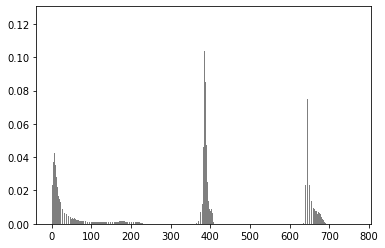

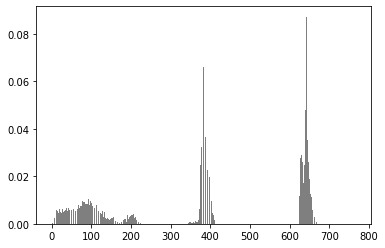

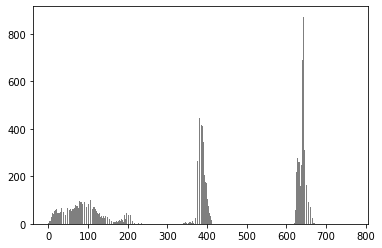

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

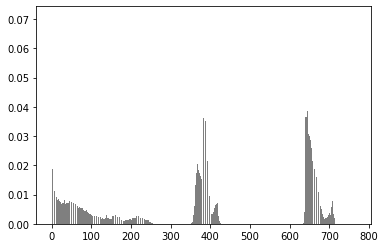

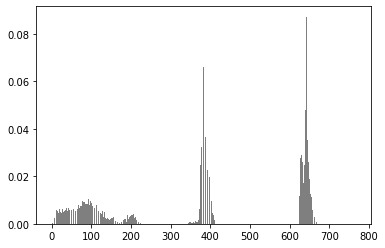

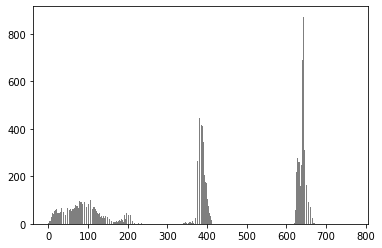

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

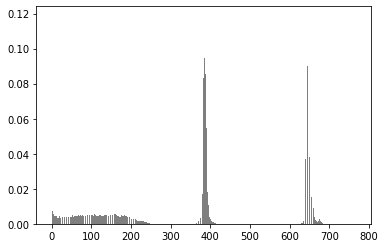

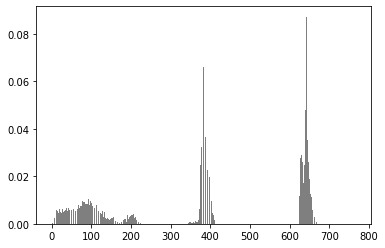

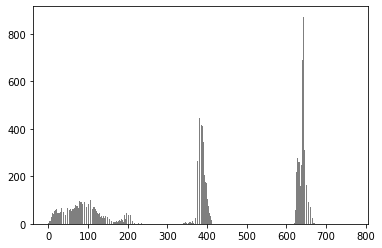

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

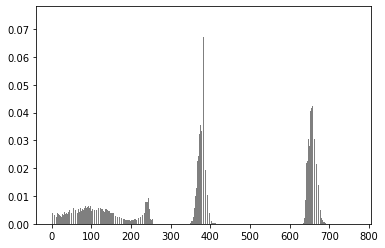

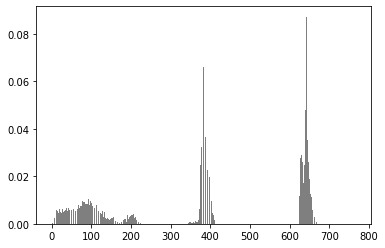

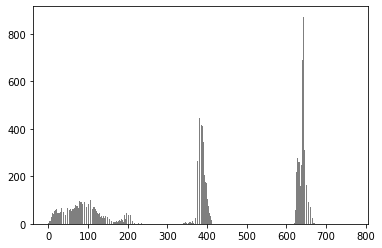

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

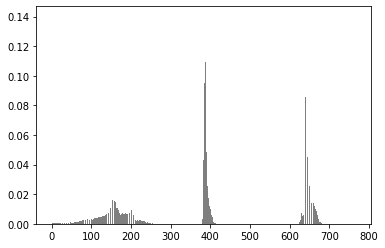

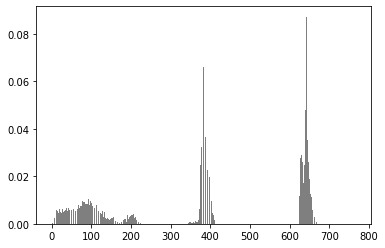

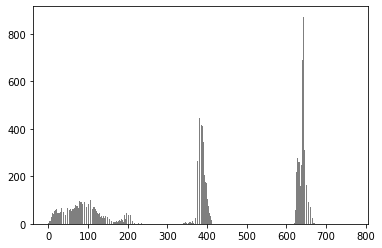

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

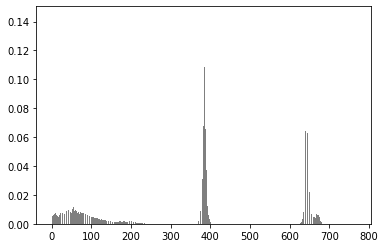

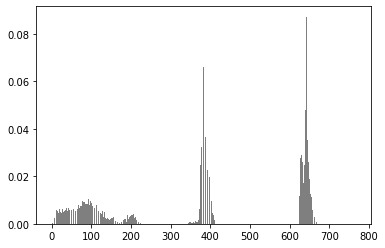

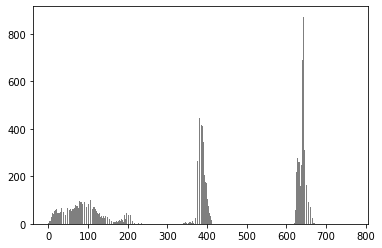

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

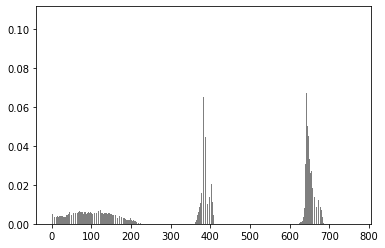

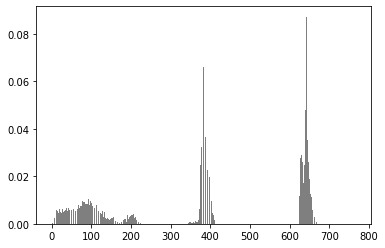

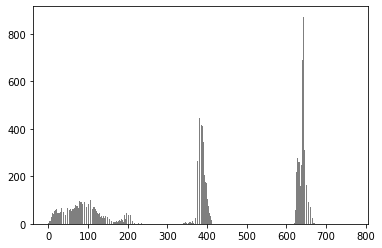

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

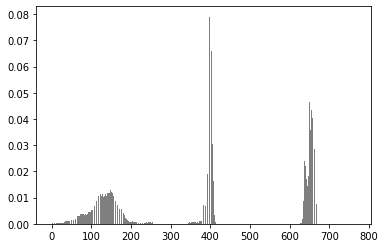

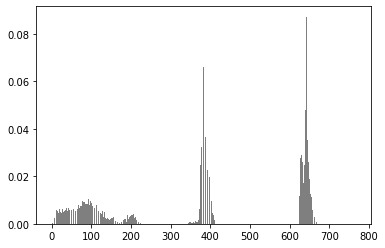

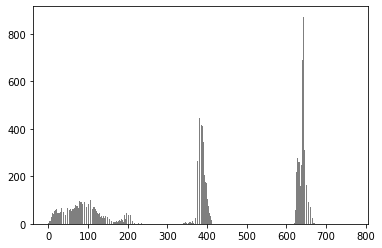

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

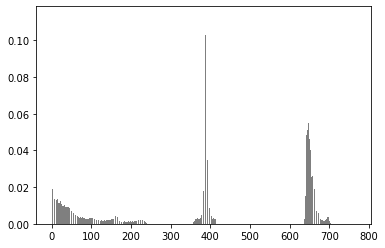

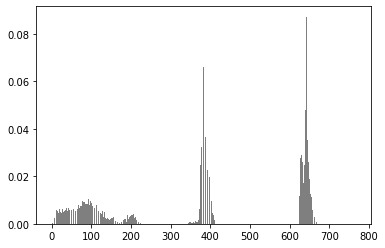

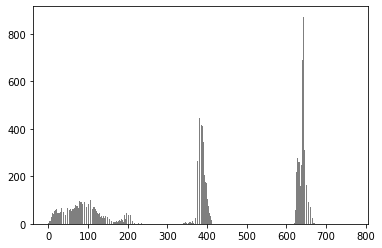

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

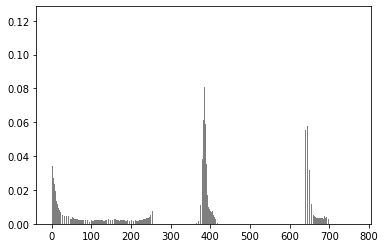

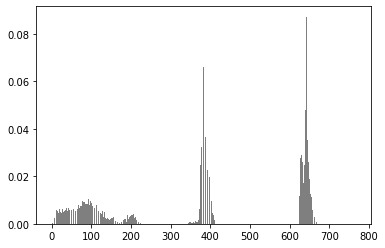

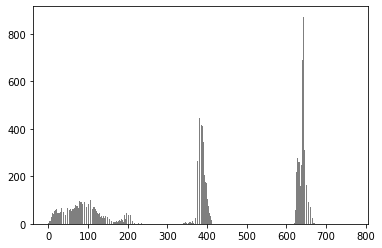

0.0003,0.0002,0.0004,0.0011,0.0014,0.0011,0.0027,0.0026,0.0027,0.003,0.0048,0.0056,0.0057,0.0043,0.0073,0.0052,0.0065,0.0047,0.0057,0.0073,0.0063,0.0049,0.0051,0.0046,0.0049,0.0047,0.0059,0.0061,0.0047,0.0064,0.005,0.0065,0.0054,0.0068,0.006,0.0057,0.0062,0.0068,0.005,0.0057,0.0053,0.0063,0.0067,0.0037,0.0066,0.006,0.0047,0.0061,0.0065,0.0052,0.0059,0.0057,0.0056,0.006,0.0057,0.0063,0.0061,0.0055,0.0056,0.0056,0.0053,0.0061,0.0051,0.0062,0.0067,0.0063,0.0066,0.005,0.008,0.0072,0.0066,0.0074,0.0077,0.0076,0.0093,0.0073,0.0067,0.0092,0.0095,0.0074,0.0094,0.0094,0.0088,0.0092,0.009,0.0084,0.0083,0.0093,0.0083,0.009,0.0083,0.0091,0.0104,0.0106,0.0091,0.008,0.0071,0.0067,0.0097,0.0079,0.0089,0.0083,0.0078,0.0073,0.0074,0.0062,0.0101,0.0062,0.0066,0.0063,0.0068,0.0064,0.0059,0.0078,0.0069,0.0047,0.0069,0.0063,0.0055,0.0063,0.0056,0.0055,0.0067,0.0044,0.0048,0.0046,0.004,0.0054,0.0055,0.0044,0.0038,0.003,0.0039,0.005,0.0033,0.0034,0.0024,0.0037,0.0022,0.0034,0.0028,0.0024,0.0027,0.0019,0.0033

'\nf = IntProgress(min=0, max=len(results))\ndisplay(f)\ncon = sqlite3.connect("mushrooms.sqlite")\ncur = con.cursor()\nfor i, result in enumerate(results):\n    f.value = i\n    histo = serialize_list_to_str(get_histogram_for_db(result[1]))\n    print(histo)\n    try:\n        with con:\n            cur.execute("INSERT INTO histograms (id, lab) VALUES (:id, :lab)", {"id": result[0], "lab": histo})\n            con.commit()\n    except sqlite3.DatabaseError as ex:\n        print("hist Exception: ", ex, i, shroom)\ncon.close()\n'

In [49]:
from ipywidgets import IntProgress

query = "SELECT * FROM mushrooms ORDER BY random() LIMIT 1"
query = "SELECT * FROM mushrooms ORDER BY id"

con = sqlite3.connect("mushrooms.sqlite")
cur = con.cursor()
try:
    cur.execute(query)
except sqlite3.DatabaseError as ex:
    print("Exception: ", ex)
results = cur.fetchall()
con.close()
for result in results[:10]:
    print(serialize_list_to_str(get_histogram_for_db(result[1], display=True, bins=256*3)))
"""
f = IntProgress(min=0, max=len(results))
display(f)
con = sqlite3.connect("mushrooms.sqlite")
cur = con.cursor()
for i, result in enumerate(results):
    f.value = i
    histo = serialize_list_to_str(get_histogram_for_db(result[1]))
    print(histo)
    try:
        with con:
            cur.execute("INSERT INTO histograms (id, lab) VALUES (:id, :lab)", {"id": result[0], "lab": histo})
            con.commit()
    except sqlite3.DatabaseError as ex:
        print("hist Exception: ", ex, i, shroom)
con.close()
"""

In [13]:
def execute_query(query: str):    
    con = sqlite3.connect("mushrooms.sqlite")
    cur = con.cursor()
    try:
        cur.execute(query)
    except sqlite3.DatabaseError as ex:
        print("Exception: ", ex)
    results = cur.fetchall()
    con.close()
    return results

In [18]:
qquery = "SELECT count(*) FROM mushrooms"
quickie = execute_query(qquery)
for result in quickie[:10]:
    print(result)

(8781,)


In [17]:
type(binned_hist)

list

In [25]:
create_table_query = "CREATE TABLE histograms (id INTEGER PRIMARY KEY, lab TEXT, CONSTRAINT fk_histograms_mushrooms FOREIGN KEY (id) REFERENCES mushrooms(id))"
con = sqlite3.connect("mushrooms.sqlite")
try:
    con.execute(create_table_query)
except sqlite3.DatabaseError as ex:
    print("Exception: ", ex)
con.close()

In [27]:
con.close()